# PROJECT - 13 Prediction Of Doctor Consultation Fee

Project Description:-

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a 
data scientist we all should do better. In this project i have data that records important details about a doctor and 
I will build a model to predict the doctor’s consulting fees.It required lot of string manipulation techniques to 
engineer the data before we feed into the model to predict the Doctor's consultation fees. 

Dataset Description:-
    
Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [1]:
#Importing some libary to import the dataset
import pandas as pd

In [2]:
#Importing data into dataframe called df by using panda library
df = pd.read_excel("Final_Train.xlsx")
df.head()# Checking first five records of dataset

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# EDA

In [3]:
df.shape#Checking the shape of dataframe to know that how many rows and how many columns are in the dataframe df.
df.shape

(5961, 7)

Here we can see that there is 5961 rows and 7 columns are present in the dataset.

In [4]:
# This will print the names of all columns.
df.columns  

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [5]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


From above observation we can see that there is missing values present in the datset in some columns. We see below in details.

In [6]:
#To show the total count of missing values present in each column in the dataset

df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see that in rating there are 3302 values are missing,in place 25 and in Miscellaneous_Info there are 2620 missing values

# Summary Statistics

In [7]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation:-

1. The minimum fees is 5 rupees and maximum fees is 950 rupees.


2. Mean is higher than median so i can say that the fees columns is righr skewed and not normally distributed.

We have seen that in rating there are 3302 values are missing,in place 25 and in Miscellaneous_Info there are 2620 missing values.

In [8]:
df['Rating'].describe()#Checking description of the data

count     2659
unique      51
top       100%
freq       684
Name: Rating, dtype: object

In [9]:
df['Rating']= df['Rating'].str.replace('%', '')#Removing % sign

In [10]:
df['Rating'] = df['Rating'].fillna("0").astype(int)#Changing the datatype in int and replacing the missing values with 0

In [11]:
#Preprocess the column Exprince to take only numerical values
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)


In [12]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [13]:
df['Place'].fillna('missing', inplace=True) #Replacing Missing value
df['Miscellaneous_Info'].fillna('missing', inplace=True) #Replacing Missing value 

In [14]:
#Separting the place accroding to city and area
df[['Area', 'City']] = df['Place'].str.split(',', n=1, expand=True)

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,missing,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [16]:
df.drop(['Place'],axis=1,inplace=True)
df['City'].fillna('missing', inplace=True) #Replacing Missing value

In [17]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Profile               0
Miscellaneous_Info    0
Fees                  0
Area                  0
City                  0
dtype: int64

In [18]:
#Checking the different types of qualifications with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [19]:
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

From abobe observation we can see that there are multiples qualifications labels present and all are mess.
I will use top 10 qualifications

In [20]:
#Extract top 10 qualifications 
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [21]:
#Encode extracted top 10 qualification into new columns in dataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [22]:
df.drop(['Qualification'],axis=1,inplace=True)
#I have seen that Miscellaneous_Info column is very mess and less informative so i will drop this column as well
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)
df.head()

,Experience,Rating,Profile,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [23]:
#After checking unique values in area i found that there is huge data available and it is playing same role like city so
#i will drop area column will use city.
df.drop(['Area'],axis=1,inplace=True)


In [24]:
df.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


# Data Visulization

In [25]:
#importing Some library to visualize the dataset and finding some observation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

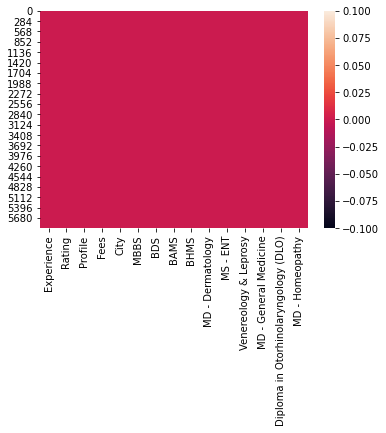

In [26]:
#Checking null values present in the dataset
sns.heatmap(df.isnull())

We can see that there is no missing value present in the dataset as there is no any gap exist in the plot.

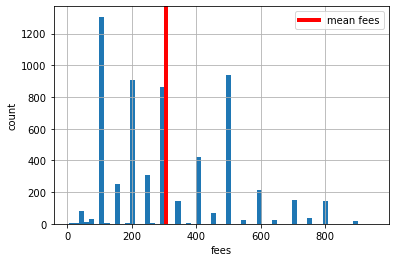



Mean Fees:  307.9446401610468


In [27]:
#Checking how my target variable distributed and mean fees
fees  = df['Fees'].hist(bins=60)
mean_val = np.mean(df['Fees'])
plt.axvline(mean_val,linewidth=4,color="red",label="mean fees")
plt.xlabel("fees")
plt.ylabel("count")
plt.legend()
plt.show()
print("\n")
print("Mean Fees: ",mean_val)


From above observation we can see that the mean fees is 307.94 and the fees is not normally distributed.

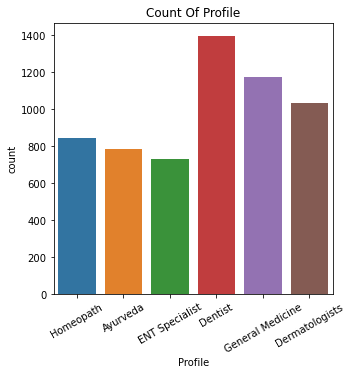

In [28]:
#Checking count of my target varibles
plt.figure(figsize=(5,5))
sns.countplot(df['Profile'])
plt.xticks(rotation=30)
plt.title("Count Of Profile")
plt.show()

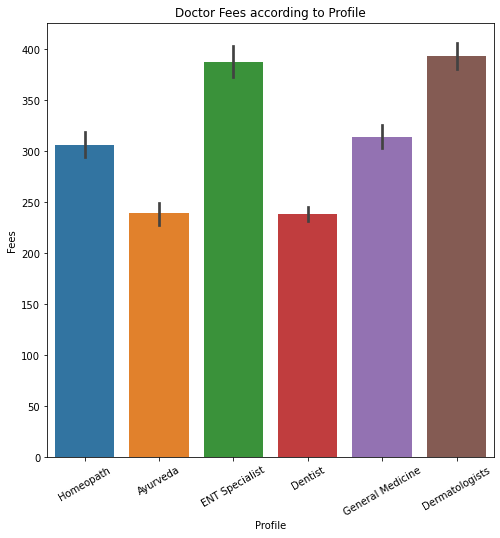

In [29]:
#Checking the doctor fees according to profile
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Doctor Fees according to Profile")
plt.xticks(rotation=30)
plt.show()
print('\n')

From above observation we can see that the fees is highest for Dermatologist and ENT Specialist and lowest for Dentist and Ayurveda. Where Fees for Homeopath and General Medicine are at same level.

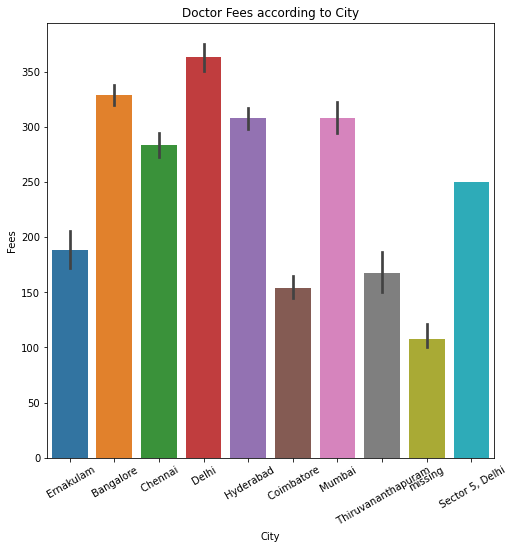

In [30]:
#Checking the doctor fees according to city
plt.figure(figsize=(8,8))
sns.barplot(x='City',y='Fees',data=df)
plt.title("Doctor Fees according to City")
plt.xticks(rotation=30)
plt.show()

In [31]:
df['City'] = np.where(df['City']==" Sector 5, Delhi"," Delhi", df['City'])#Sector 5, Delhi iss also in delhi so correcting this

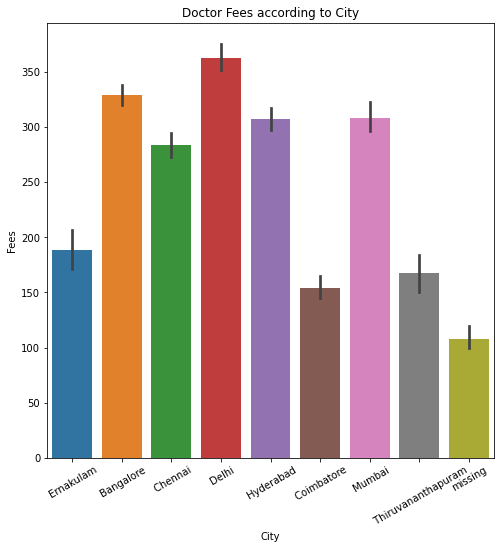

In [32]:
#Checking the doctor fees according to city
plt.figure(figsize=(8,8))
sns.barplot(x='City',y='Fees',data=df)
plt.title("Doctor Fees according to City")
plt.xticks(rotation=30)
plt.show()

Now here we can see that the fees is high in the cities like Delhi,Banglore,Mumbai,Chennai. I think as it is tier 1 cities so
fees is high where as the fees are low in Coimbatore,Ernakulam,Thiruvananthapuram as thses cities are tier 2 and tier3 cities.

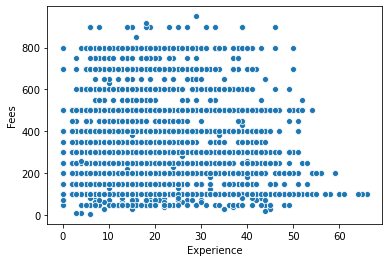

In [33]:
#Checking number Of deaths vs No of active cases
sns.scatterplot(x="Experience",y="Fees",data=df)

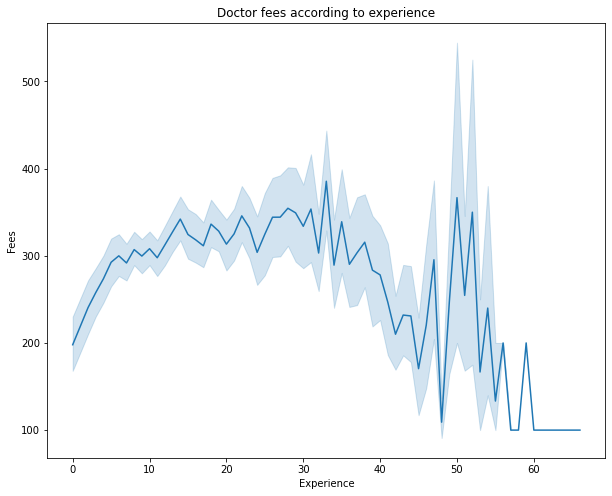

In [34]:
#Checking the doctor fees according to experience
plt.figure(figsize=(10,8))
sns.lineplot(x='Experience',y='Fees',data=df)
plt.title("Doctor fees according to experience")
plt.show()

From above observation we can see that there is high fluctuation of fees according to experience.The fees is very high between
experience 30 and 35.where after the exprience of 60 years the fees is very low.

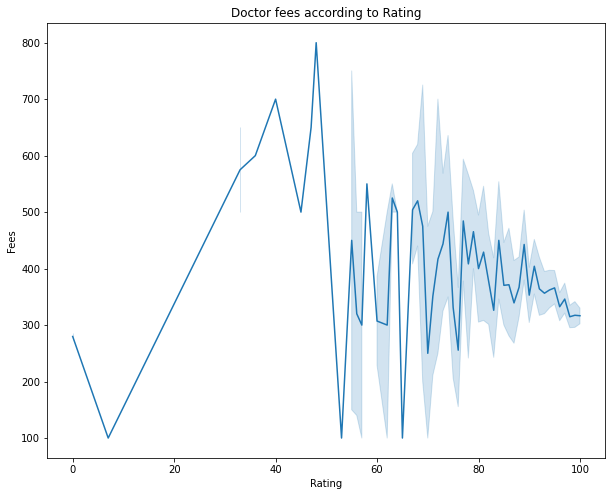

In [35]:
#Checking the Doctor fees according to rating
plt.figure(figsize=(10,8))
sns.lineplot(x='Rating',y='Fees',data=df)
plt.title("Doctor fees according to Rating")
plt.show()

We can see that fees is very high where rating lies between 40 to 60. Where rating is high then fees is low .

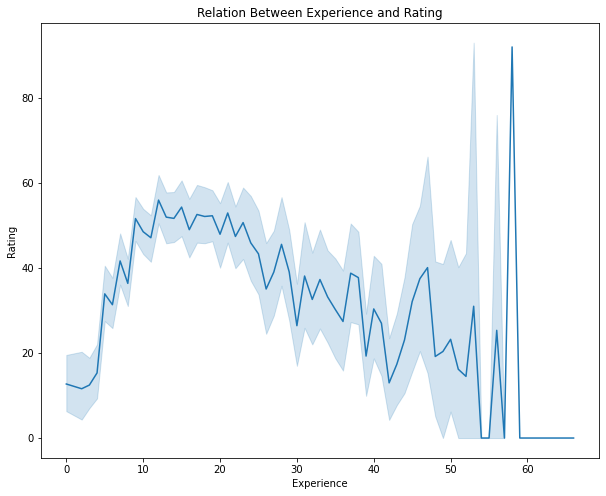

In [36]:
#Checking the doctor fees according to experience
plt.figure(figsize=(10,8))
sns.lineplot(x='Experience',y='Rating',data=df)
plt.title("Relation Between Experience and Rating")
plt.show()

Here we can see that rating is high where experience lies between 50 to 60 years and when experience go above  than 60 the 
rating is low. So high experinece can not gurantee the good rating.

In [37]:
#Converting City and Profile into column
df = pd.get_dummies(df,columns=['City','Profile'], prefix=['City','Profile'])

In [38]:
#Top 5 records
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_missing,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,98,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,100,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


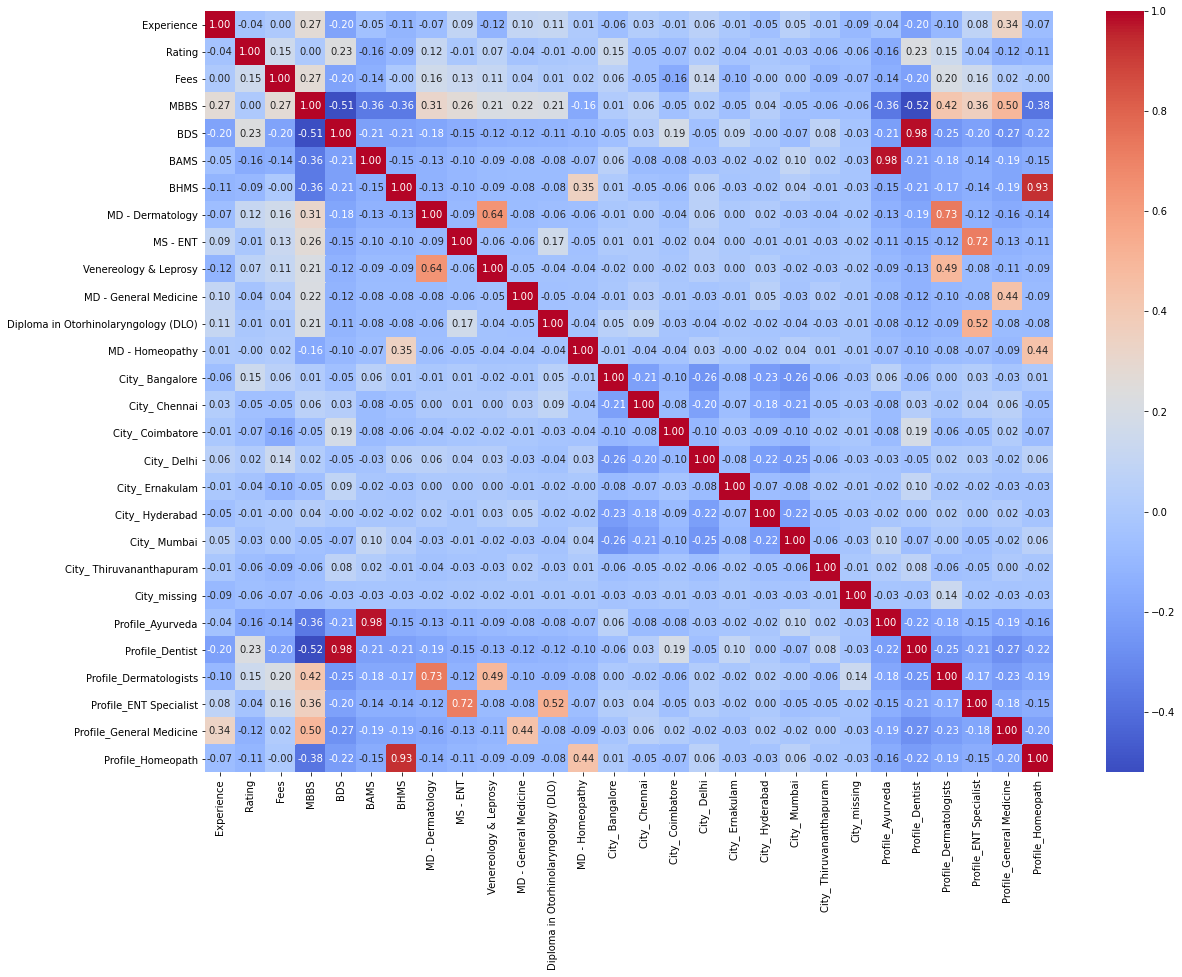

In [39]:
#Checking corelation of all columns with targer column
plt.figure(figsize=(19,14))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')

Observation:-

1. Highest +ve corelated column with target variable:- MBBS.
   It suugest that the doctor who has qualification MBBS the fees is high.
   
2. Highest -ve corelated column with target variabel - BDS
   it means the doctor with BDS qualification has lowest fees.
   
There are various positive corelated columns like Rating, Profile, MD - Dermatology etc.
There are also some more columns which are -ve corelated are - BHMS ,City etc.


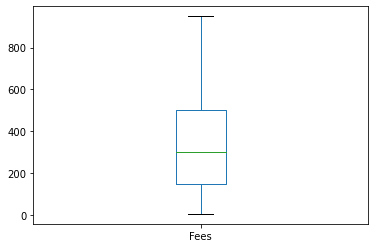

In [40]:
#Checking Outliers In Fees
df['Fees'].plot.box()

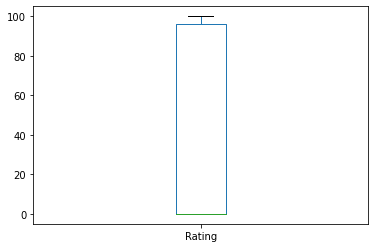

In [41]:
df['Rating'].plot.box()

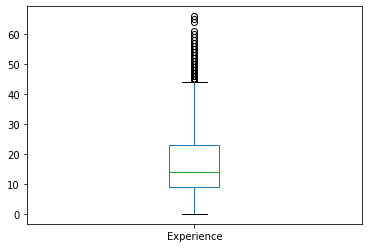

In [42]:
df['Experience'].plot.box()

So from above observations we can see that there is outliers present in experience column.

In [43]:
#Treating Outliers
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_missing,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
1,12,98,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,100,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,8,0,100,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,47,0,100,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5954,31,0,300,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5957,33,0,100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,97,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
df.shape

(5961, 28)

In [45]:
#Percentage Loss of data after removing outliers
percentage_loss=((5961-4149)/5961)*100
percentage_loss

30.397584297936586

In [46]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Experience                               14.0
Rating                                   96.0
Fees                                    350.0
MBBS                                      1.0
BDS                                       0.0
BAMS                                      0.0
BHMS                                      0.0
MD - Dermatology                          0.0
MS - ENT                                  0.0
Venereology & Leprosy                     0.0
MD - General Medicine                     0.0
Diploma in Otorhinolaryngology (DLO)      0.0
MD - Homeopathy                           0.0
City_ Bangalore                           0.0
City_ Chennai                             0.0
City_ Coimbatore                          0.0
City_ Delhi                               0.0
City_ Ernakulam                           0.0
City_ Hyderabad                           0.0
City_ Mumbai                              0.0
City_ Thiruvananthapuram                  0.0
City_missing                      

In [47]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(0, 28)


In [48]:
df.dtypes

Experience                              int32
Rating                                  int32
Fees                                    int64
MBBS                                    int64
BDS                                     int64
BAMS                                    int64
BHMS                                    int64
MD - Dermatology                        int64
MS - ENT                                int64
Venereology & Leprosy                   int64
MD - General Medicine                   int64
Diploma in Otorhinolaryngology (DLO)    int64
MD - Homeopathy                         int64
City_ Bangalore                         uint8
City_ Chennai                           uint8
City_ Coimbatore                        uint8
City_ Delhi                             uint8
City_ Ernakulam                         uint8
City_ Hyderabad                         uint8
City_ Mumbai                            uint8
City_ Thiruvananthapuram                uint8
City_missing                      

# Preparing dataset For Model Training

In [49]:
#Seprating independent and target variable
x= df.drop("Fees",axis=1)
y= df["Fees"] #Target variable

In [50]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

In [51]:
#Finding Best Random State
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 20.527764954172735 found on random_state 159


In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=159)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

In [54]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [55]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [56]:
# Training and testing
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7873055470571583
SVR() 0.8085254495678131
DecisionTreeRegressor() 0.6666020237890595
RandomForestRegressor() 0.7749043448409019


In [57]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [78]:
model = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
for m in model:
    m.fit(x_train, y_train)
    
    y_pred = m.predict(x_test)    
    print(m, score(y_pred,y_test)*100)
    rdscore = cross_val_score(m,X,y,cv=3)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")    
    print('Mean Absolute Error:= ',mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error:= ',mean_squared_error(y_test,y_pred))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test,y_pred)))    
    print("**************************************************************************************************************")
    print('\n')
    
    
    
    
    

LinearRegression() 79.59155167829638
Cross Val Score=  17.49093674077662
Error:
Mean Absolute Error:=  136.12921400203294
Mean Squared Error:=  29223.881656372163
Root Mean Square Error;=  170.94993903588315
**************************************************************************************************************


Lasso() 80.22354272183087
Cross Val Score=  17.585125596553112
Error:
Mean Absolute Error:=  132.75688659365403
Mean Squared Error:=  27904.887582435822
Root Mean Square Error;=  167.04756083952805
**************************************************************************************************************


Ridge() 80.23392206943383
Cross Val Score=  17.463571054539354
Error:
Mean Absolute Error:=  132.51438030055454
Mean Squared Error:=  27895.235696328316
Root Mean Square Error;=  167.01866870601117
**************************************************************************************************************


DecisionTreeRegressor() 66.78499755816073
Cross Val Score

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor


In [81]:
model = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SGDRegressor()]
for m in model:
    m.fit(x_train, y_train)
    
    y_pred = m.predict(x_test)
    
    print(m, score(y_pred,y_test)*100)    
    rdscore = cross_val_score(m,X,y,cv=3)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")    
    print('Mean Absolute Error:= ',mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error:= ',mean_squared_error(y_test,y_pred))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test,y_pred)))    
    print("**************************************************************************************************************")
    print('\n')
    
    

RandomForestRegressor() 77.46930817015702
Cross Val Score=  2.230778098626189
Error:
Mean Absolute Error:=  144.18780642494238
Mean Squared Error:=  35346.60566426233
Root Mean Square Error;=  188.00692983042495
**************************************************************************************************************


AdaBoostRegressor() 76.77613375919263
Cross Val Score=  12.747668337524996
Error:
Mean Absolute Error:=  143.77492396644098
Mean Squared Error:=  30457.369682135384
Root Mean Square Error;=  174.52039904302129
**************************************************************************************************************


GradientBoostingRegressor() 80.74772160146959
Cross Val Score=  19.431646454241804
Error:
Mean Absolute Error:=  131.2309770420174
Mean Squared Error:=  27508.62677775618
Root Mean Square Error;=  165.8572481917995
**************************************************************************************************************


SGDRegressor() 80.342645

After using all algorithm and boosting techniques i found GradientBoostingRegressor() Perform good with 80.74 accuracy score
and 19.43 cross_val score. I will use hypertuning method to increase accuracy

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= {'loss':['ls', 'lad', 'huber', 'quantile'],'criterion':['friedman_mse', 'mse', 'mae']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'loss': 'ls'}


In [85]:
gbr = GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=100)
gbr.fit(x_train, y_train)
    
y_pred = gbr.predict(x_test)
    
print(gbr, score(y_pred,y_test)*100)    
rdscore = cross_val_score(gbr,X,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)
print("Error:")    
print('Mean Absolute Error:= ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:= ',mean_squared_error(y_test,y_pred))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test,y_pred)))    
print("**************************************************************************************************************")
print('\n')
    
    

GradientBoostingRegressor() 80.74986620329977
Cross Val Score=  19.427454912809516
Error:
Mean Absolute Error:=  131.23376664657295
Mean Squared Error:=  27506.85012398888
Root Mean Square Error;=  165.85189213267626
**************************************************************************************************************




# Model Saving

In [87]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(gbr,'gbrfile.obj')

['gbrfile.obj']

In [88]:
#Loading to see my model
gbr_from_joblib = joblib.load('gbrfile.obj')
gbr_from_joblib

GradientBoostingRegressor()

In [90]:
#Importing data into dataframe called df by using panda library
df1 = pd.read_excel("Final_Test.xlsx")
df1.head()# Checking first five records of dataset

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [92]:
df1['Rating']= df1['Rating'].str.replace('%', '')#Removing % sign

In [94]:
df1['Rating'] = df1['Rating'].fillna("0").astype(int)#Changing the datatype in int and replacing the missing values with 0

In [96]:
#Preprocess the column Exprince to take only numerical values
df1['Experience'] = df1['Experience'].str.replace('years experience','').astype(int)


In [98]:
df1.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   6
Profile                 0
Miscellaneous_Info    834
dtype: int64

In [101]:
#Separting the place accroding to city and area
df1[['Area','City']] = df['Place'].str.split(',', n=1, expand=True)

In [102]:
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Area,City
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [104]:
df1.drop(['Place'],axis=1,inplace=True)

In [107]:
#Checking the different types of qualifications with there counts
df1["Qualification"]=df1["Qualification"].str.split(",")
Qualification ={}
for x in df1["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [108]:
#Extract top 10 qualifications 
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [109]:
# QUALIFICATION COLUMN
# HERE the top 10 Qual of train and test col should be same so I am imputing the train col to test col
data = pd.read_excel('Final_Train.xlsx')
data['Qualification'] = data['Qualification'].str.split(",")
Qualification = {}
for x in data['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1
            
# finding out the top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    df1[title] = 0

for x,y in zip(df1['Qualification'].values, np.array([i for i in range(len(df1))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df1[c][y] = 1
            
#drop Qualification after getting top 10 qual.
df1.drop('Qualification',axis=1,inplace=True)


In [110]:
df1

,Experience,Rating,Profile,Miscellaneous_Info,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,35,0,General Medicine,NaN,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,0,ENT Specialist,NaN,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1,0,0,0,0,0,0,0,0,0
3,0,0,Ayurveda,NaN,New Ashok Nagar,Delhi,0,0,1,0,0,0,0,0,0,0
4,16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,Ayurveda,NaN,Basavanagudi,Bangalore,0,0,1,0,0,0,0,0,0,0
1983,4,0,Dermatologists,NaN,Choolai,Chennai,1,0,0,0,1,0,1,0,0,0
1984,9,0,General Medicine,NaN,Porur,Chennai,1,0,0,0,0,0,0,0,0,0
1985,12,98,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Arekere,Bangalore,0,1,0,0,0,0,0,0,0,0


In [114]:
#city column treatment


#encode city and profile
df1 = pd.get_dummies(df1, columns=['City','Profile'], prefix=['City','Profile'])

#drop Miscellaneous_Info and Area
df1.drop(['Miscellaneous_Info','Area'], axis=1, inplace=True)

In [115]:
df1

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,31,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,40,70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,4,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1984,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,98,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
df1.dtypes

Experience                              int32
Rating                                  int32
MBBS                                    int64
BDS                                     int64
BAMS                                    int64
BHMS                                    int64
MD - Dermatology                        int64
MS - ENT                                int64
Venereology & Leprosy                   int64
MD - General Medicine                   int64
Diploma in Otorhinolaryngology (DLO)    int64
MD - Homeopathy                         int64
City_ Bangalore                         uint8
City_ Chennai                           uint8
City_ Coimbatore                        uint8
City_ Delhi                             uint8
City_ Ernakulam                         uint8
City_ Hyderabad                         uint8
City_ Mumbai                            uint8
City_ Thiruvananthapuram                uint8
Profile_Ayurveda                        uint8
Profile_Dentist                   

In [129]:
#Adding column which is missing in test data as i had this in my train data
idx = 20
new_col = 0 # can be a list, a Series, an array or a scalar   
df1.insert(loc=idx, column='City_missing', value=new_col)

In [130]:
df1.head()

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_missing,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,31,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,40,70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [131]:
x=df1

In [132]:
x.shape


(1987, 27)

In [133]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

In [135]:
x_predict=gbr_from_joblib.predict(X)
x_predict

array([314.56987038, 327.78898969, 344.62925664, ..., 311.89880308,
       242.668741  , 366.21630157])

In [138]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
prediction = pd.DataFrame(x_predict, columns=['Predictions']).to_csv('DoctorFees_Prediction.csv')

In [141]:
Predicted = pd.read_csv('DoctorFees_Prediction.csv')
Predicted.head().round()

,Unnamed: 0,Predictions
0,0,315.0
1,1,328.0
2,2,345.0
3,3,243.0
4,4,259.0


# END OF PROJECT